
<h1><center> Data Visualisation CourseWork 
(0012935093) Dorjada Halili </center> </h1>

###Importing libraries and reading the data

In [ ]:
#import libraries
!pip install hvplot
import holoviews as hv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import hvplot.pandas
import panel as pn
import math

pn.extension()
pd.plotting.register_matplotlib_converters()

#read the data
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001293509/OutletDailyCustomers.csv', index_col=0)
data.index = pd.to_datetime(data.index)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 22.9 MB/s eta 0:00:00


In [ ]:
#summary data
marketing = pd.read_csv('https://tinyurl.com/ChrisCoDV/001293509/OutletMarketing.csv', index_col=0)
overheads = pd.read_csv('https://tinyurl.com/ChrisCoDV/001293509/OutletOverheads.csv', index_col=0)
size = pd.read_csv('https://tinyurl.com/ChrisCoDV/001293509/OutletSize.csv', index_col=0)
staff = pd.read_csv('https://tinyurl.com/ChrisCoDV/001293509/OutletStaff.csv', index_col=0)

summary_data = pd.DataFrame(index=data.columns)

summary_data['Marketing'] = marketing.values
summary_data['Overheads'] = overheads.values
summary_data['Size'] = size.values
summary_data['Customers'] = data.sum().values
summary_data['Staff'] = staff.values
summary_data
variables = list(summary_data.columns)
data.columns

Index(['BMF', 'OZW', 'HZQ', 'LTU', 'YMQ', 'END', 'HTF', 'YGE', 'PFQ', 'CYK',
       'ZSJ', 'AYD', 'OTL', 'EEC', 'GNL', 'RFY', 'AGN', 'DZZ', 'RAN', 'PLB',
       'NLT', 'FZI', 'EHT', 'NFH', 'CTH', 'FTW', 'XSB', 'DSA', 'EYS', 'BSQ',
       'GFA', 'DMN', 'HNV', 'IZX', 'LLK', 'CGV', 'DTO', 'MTE', 'ZYT', 'IFI',
       'ZMY', 'DHJ', 'CNW', 'QZF', 'MZO'],
      dtype='object')

In [ ]:
data.head()

BMF  OZW  HZQ  LTU  YMQ  END  HTF  YGE  PFQ  CYK  ...  CGV  DTO  \
Date                                                           ...             
2021-01-01  1196   73   69   73    0   93  105   75   82  819  ...  727   81   
2021-01-02   950  100   58   92    0   89   92   64   69  821  ...  765   76   
2021-01-03   607   91   65   83    0   83   71   59   65  739  ...  724   81   
2021-01-04   918   98   61   87    0   97  117   76   93  626  ...  695   80   
2021-01-05   748   88   57   75    0   98   89   60   67  720  ...  696   83   

            MTE  ZYT  IFI  ZMY  DHJ  CNW  QZF  MZO  
Date                                                
2021-01-01   65   69   81    0   92   72   77   67  
2021-01-02   49   66   95    0   85   69   74   66  
2021-01-03   64   70   77    0   98   82   88   80  
2021-01-04   64   74   78    0   79   62   69   66  
2021-01-05   66   63   80    0  111   67   66   62  

[5 rows x 45 columns]

### Sorting the data

In [ ]:
data = data.reindex(data.sum().sort_values(ascending=False).index, axis=1)
print(data.sum())

RAN    757745
DMN    672285
RFY    644236
DSA    362356
EYS    342451
EEC    335965
BMF    331755
BSQ    296026
CYK    282568
CGV    265033
END     34315
DHJ     33249
OZW     33210
PLB     33026
NFH     31613
IFI     30200
FZI     30178
LLK     29596
DTO     29388
OTL     29382
EHT     28609
LTU     28202
QZF     27752
GNL     27086
FTW     27046
PFQ     26323
CNW     25669
MZO     24794
HZQ     23276
DZZ     23191
NLT     23137
MTE     22979
CTH     22622
GFA     22567
YGE     18481
HNV     15970
HTF     15947
IZX     15795
AYD     13045
XSB     10280
ZSJ      8431
YMQ      8414
ZYT      6120
ZMY      6111
AGN      5929
dtype: int64


###Segmenting the data 

In [ ]:
categories = ['High', 'Medium','Low']
categories_selected = [[] for i in range(len(categories))]

for name in data.columns:

    total_outlets = data[name].sum()
    if total_outlets > 500_000:
        category = 0
    elif total_outlets > 100_000:
        category = 1
    else:
        category = 2
   
    categories_selected[category].append(name)
    print('Outlet ' + name + ' is ' + categories[category] + ' volume')

Outlet RAN is High volume
Outlet DMN is High volume
Outlet RFY is High volume
Outlet DSA is Medium volume
Outlet EYS is Medium volume
Outlet EEC is Medium volume
Outlet BMF is Medium volume
Outlet BSQ is Medium volume
Outlet CYK is Medium volume
Outlet CGV is Medium volume
Outlet END is Low volume
Outlet DHJ is Low volume
Outlet OZW is Low volume
Outlet PLB is Low volume
Outlet NFH is Low volume
Outlet IFI is Low volume
Outlet FZI is Low volume
Outlet LLK is Low volume
Outlet DTO is Low volume
Outlet OTL is Low volume
Outlet EHT is Low volume
Outlet LTU is Low volume
Outlet QZF is Low volume
Outlet GNL is Low volume
Outlet FTW is Low volume
Outlet PFQ is Low volume
Outlet CNW is Low volume
Outlet MZO is Low volume
Outlet HZQ is Low volume
Outlet DZZ is Low volume
Outlet NLT is Low volume
Outlet MTE is Low volume
Outlet CTH is Low volume
Outlet GFA is Low volume
Outlet YGE is Low volume
Outlet HNV is Low volume
Outlet HTF is Low volume
Outlet IZX is Low volume
Outlet AYD is Low volume
O

###Bar Chart

####Bar chart all coloured

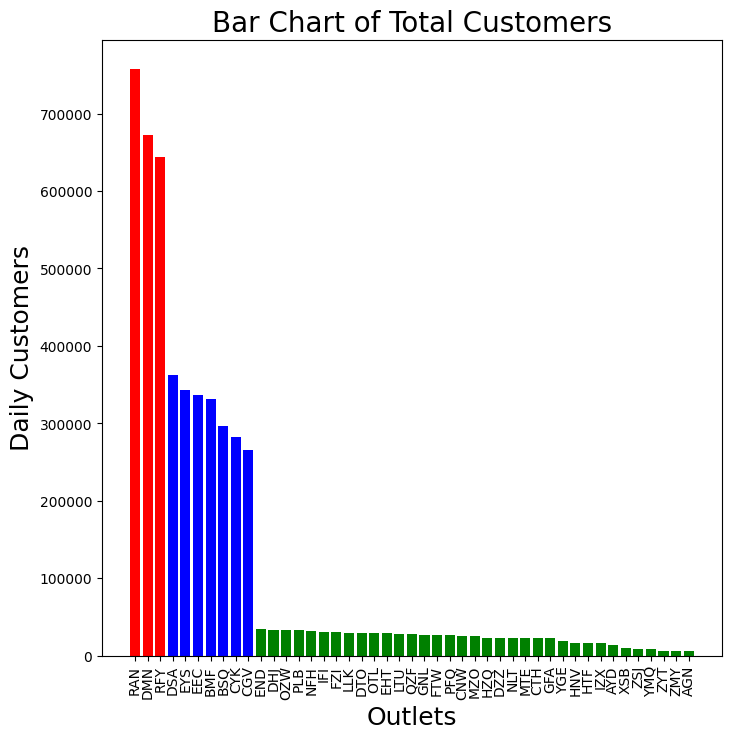

In [ ]:
colours = []
for name in data.columns:
    total_outlets = data[name].sum()
    if total_outlets > 500_000:
        colour = 'red'
    elif total_outlets > 100_000:
        colour = 'blue'
    else:
        colour = 'green'
    colours.append(colour)

plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data.columns))
plt.bar(x_pos, data.sum(), align='center', color=colours)
plt.xticks(x_pos, data.columns, rotation =90)
plt.xlabel('Outlets', fontsize=18)
plt.ylabel('Daily Customers', fontsize=18)
plt.title('Bar Chart of Total Customers', fontsize=20)
plt.show()

####Bar Chart of High Volume Outlets

             RAN   DMN   RFY
Date                        
2021-01-01  2263  1799  2004
2021-01-02  2177  1446  1945
2021-01-03  1999  1808  1757
2021-01-04  1880  1509  1614
2021-01-05  1885  1431  1622


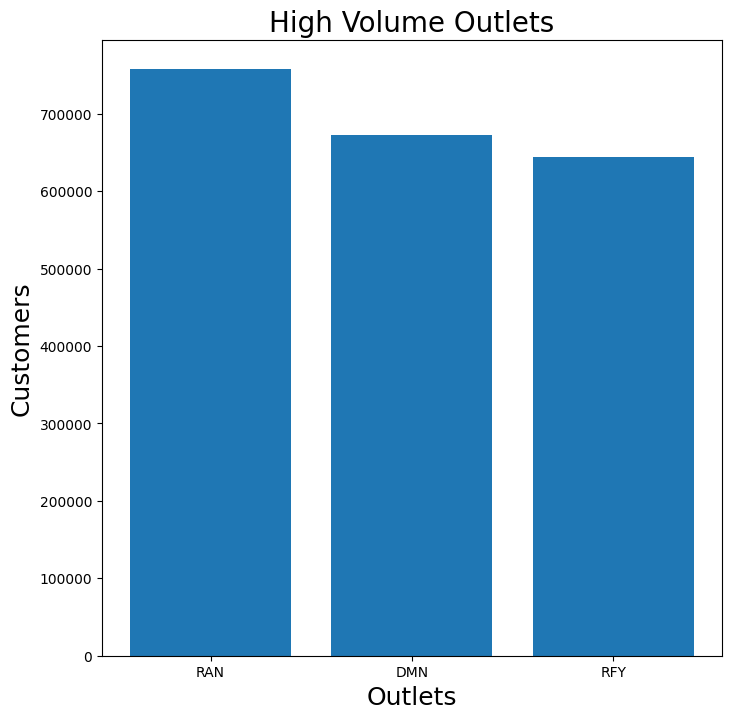

In [ ]:

selected = ['RAN', 'DMN', 'RFY']
print(data[selected].head())

# data[selected].sum().plot.bar(width=0.8, rot=0, figsize=(8, 8))
plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data[selected].columns))
plt.bar(x_pos, data[selected].sum(), align='center')
plt.xticks(x_pos, data[selected].columns)
plt.xlabel('Outlets', fontsize=18) 
plt.ylabel('Customers', fontsize=18) 
plt.title('High Volume Outlets', fontsize=20) 
plt.show()

####Bar Chart of Medium Volume Outlets

             DSA   EYS   EEC   BMF  BSQ  CYK  CGV
Date                                             
2021-01-01  1030  1092  1061  1196  796  819  727
2021-01-02  1158   909  1209   950  866  821  765
2021-01-03   887   977   934   607  801  739  724
2021-01-04   999   966   833   918  753  626  695
2021-01-05   873   853   913   748  688  720  696


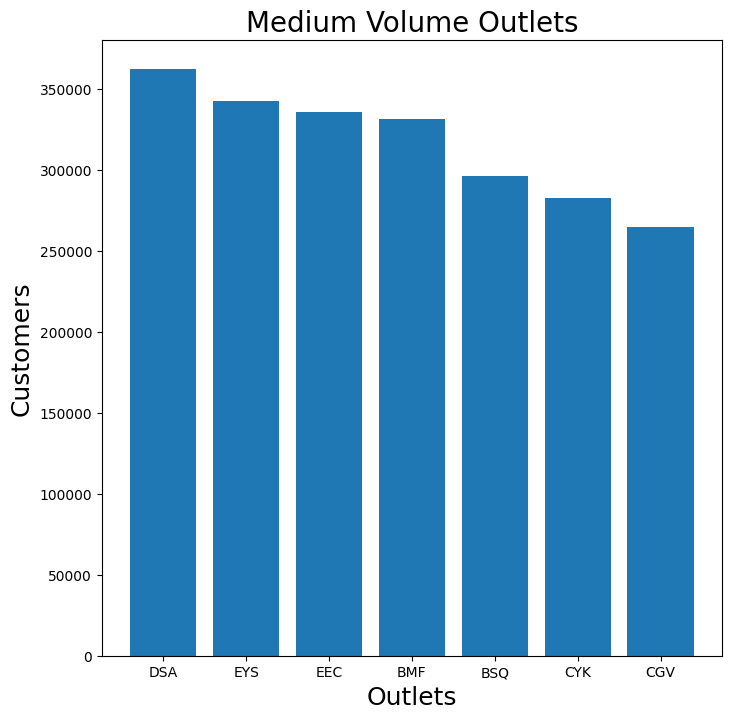

In [ ]:

selected = ['DSA', 'EYS', 'EEC','BMF','BSQ','CYK','CGV']
print(data[selected].head())

# data[selected].sum().plot.bar(width=0.8, rot=0, figsize=(8, 8))
plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data[selected].columns))
plt.bar(x_pos, data[selected].sum(), align='center')
plt.xticks(x_pos, data[selected].columns)
plt.xlabel('Outlets', fontsize=18) 
plt.ylabel('Customers', fontsize=18) 
plt.title('Medium Volume Outlets', fontsize=20) 
plt.show()

###Histogram

####Histogram of High volume outlets

15 bins


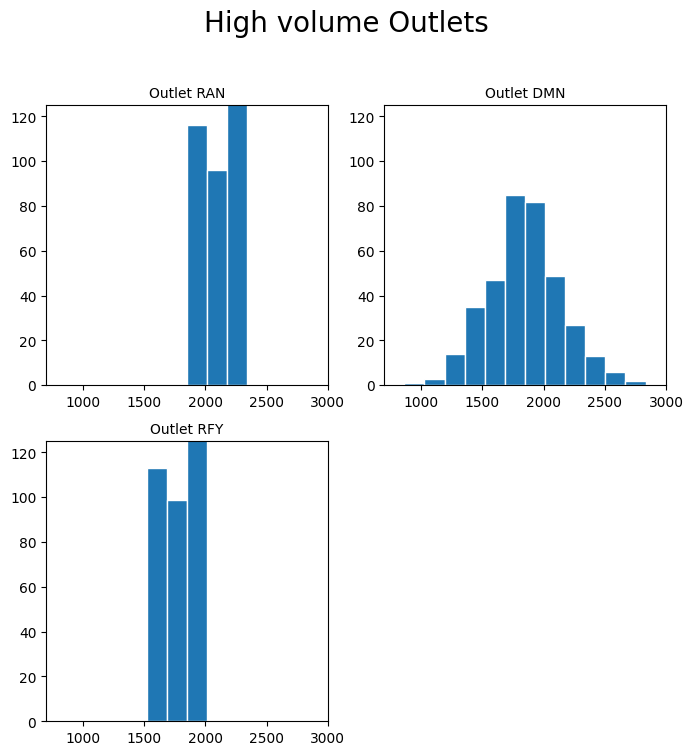

In [ ]:
selected = ['RAN', 'DMN', 'RFY']

x_min = 700
x_max = 3000
bin_width = 160 

n_bins = int((bin_width + x_max - x_min) / bin_width)
print(str(n_bins) + ' bins')
bins = [(x_min + x * (bin_width + x_max - x_min) / n_bins) for x in range(int(n_bins))]

fig = plt.figure(figsize=(8, 8))
fig.suptitle('High volume Outlets', fontsize=20, position=(0.5, 1.0))
counter = 1
for name in selected:
    sub = fig.add_subplot(2, 2, counter)
    sub.hist(data[name], bins, edgecolor='w')
    sub.set_title('Outlet ' + name, fontsize=10)
    sub.set_xlim(xmin=x_min, xmax=x_max)
    sub.set_ylim(ymin=0, ymax=125)
    counter += 1
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

####Histogram of Low Volume Outlets

13 bins


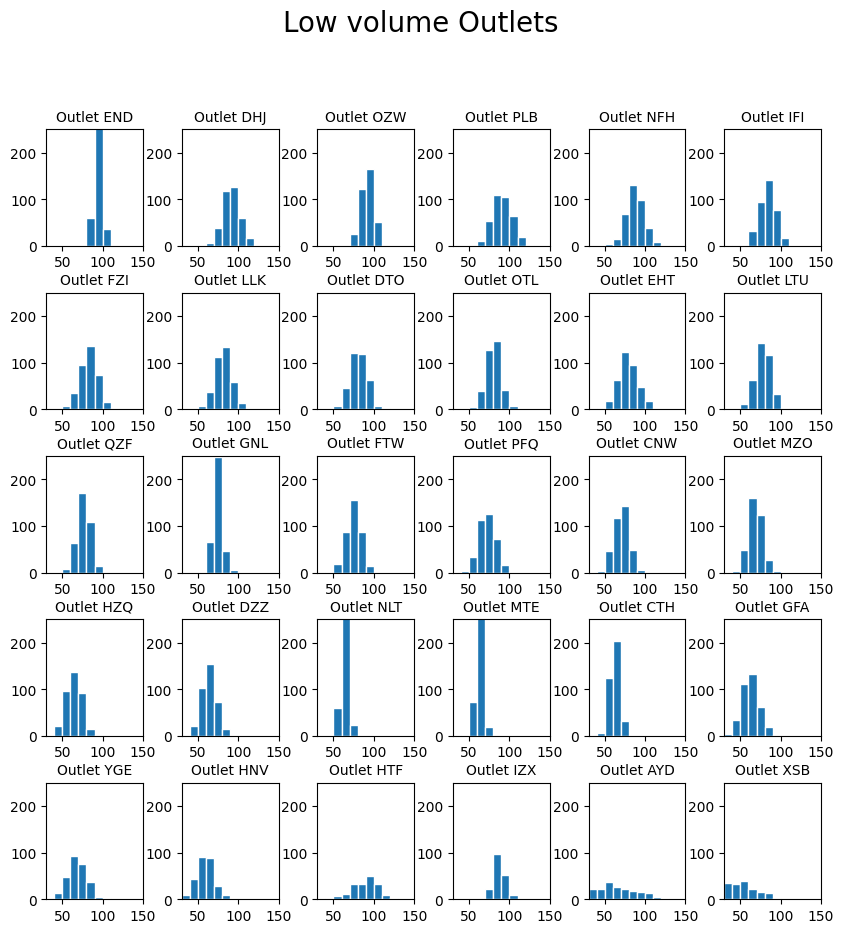

In [ ]:
selected = ['END','DHJ','OZW','PLB','NFH','IFI','FZI','LLK','DTO','OTL','EHT',
            'LTU','QZF','GNL','FTW','PFQ','CNW','MZO','HZQ','DZZ','NLT','MTE',
            'CTH','GFA','YGE','HNV','HTF','IZX','AYD','XSB']
x_min = 30
x_max = 150
bin_width = 10

n_bins = int((bin_width + x_max - x_min) / bin_width)
print(str(n_bins) + ' bins')
bins = [(x_min + x * (bin_width + x_max - x_min) / n_bins) for x in range(int(n_bins))]

fig = plt.figure(figsize=(10, 10))
fig.suptitle('Low volume Outlets', fontsize=20, position=(0.5, 1.0))
counter = 1
for name in selected:
    sub = fig.add_subplot(5, 6, counter)
    sub.hist(data[name], bins, edgecolor='w')
    sub.set_title('Outlet ' + name, fontsize=10)
    sub.set_xlim(xmin=x_min, xmax=x_max)
    sub.set_ylim(ymin=0, ymax=250)
    counter += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

###Radar Chart


In [ ]:
summary_data.columns

Index(['Marketing', 'Overheads', 'Size', 'Customers', 'Staff'], dtype='object')

####Radar Chart of High Volume Outlets

     Marketing  Overheads      Size  Customers     Staff
BMF   0.437500       0.79  0.443875   0.437819  0.285714
OZW   0.062500       0.16  0.053208   0.043827  0.057143
HZQ   0.031250       0.95  0.011313   0.030717  0.014286
LTU   0.046875       0.45  0.036769   0.037218  0.042857
YMQ   0.015625       1.00  0.008839   0.011104  0.014286


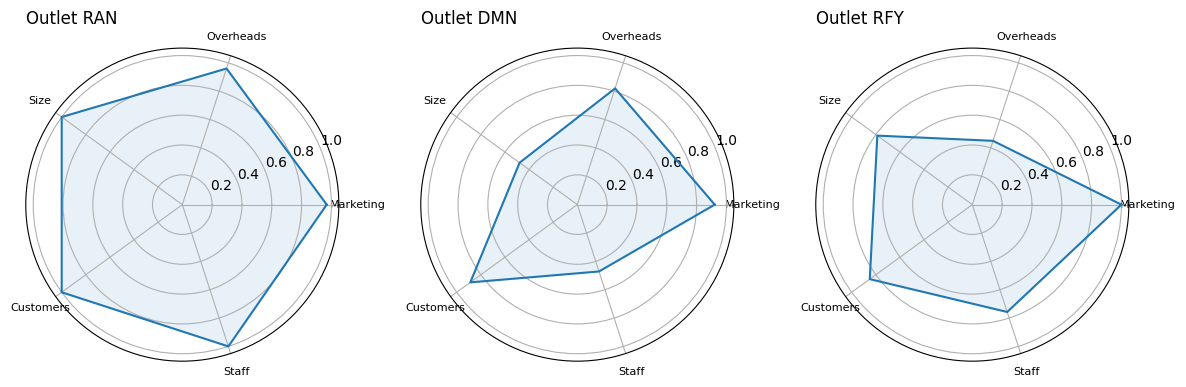

In [ ]:
normalised_data = summary_data / summary_data.max()
print(normalised_data.head())

selected = ['RAN', 'DMN', 'RFY']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(12,12))
counter = 1
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(1, 3, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title('Outlet ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()

####Radar Chart of High Volume Outlets

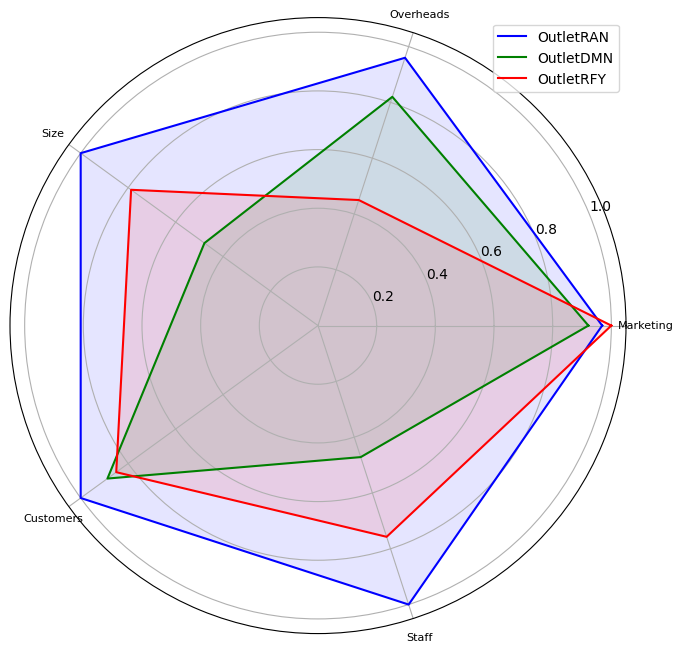

In [ ]:
normalised_data = summary_data / summary_data.max()
n_attributes = len(normalised_data.columns)
selected = ['RAN', 'DMN', 'RFY']
angles = [n/ float(n_attributes) * 2* np.pi for n in range(n_attributes + 1)]
colours = ['b','g','r']
c = 0
plt.figure(figsize=(8,8))
sub = plt.subplot(1,1,1, polar=True)
for name in selected:
  values = normalised_data.loc[[name]].values.flatten().tolist()
  values += values[:1]
  sub.plot(angles,values, colours[c % len(colours)], label= 'Outlet' + name)
  sub.fill(angles,values, colours[c% len(colours)], alpha=0.1)
  sub.set_ylim(ymax=1.05)
  sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0]) 
  sub.set_xticks(angles[0:-1])#, labels=summary_data.columns)
  sub.set_xticklabels(normalised_data.columns, fontsize=8)
  c +=1
plt.legend(loc='best')

plt.show()

####Radar Chart of Medium Volume Outlets

     Marketing  Overheads      Size  Customers     Staff
BMF   0.437500       0.79  0.443875   0.437819  0.285714
OZW   0.062500       0.16  0.053208   0.043827  0.057143
HZQ   0.031250       0.95  0.011313   0.030717  0.014286
LTU   0.046875       0.45  0.036769   0.037218  0.042857
YMQ   0.015625       1.00  0.008839   0.011104  0.014286


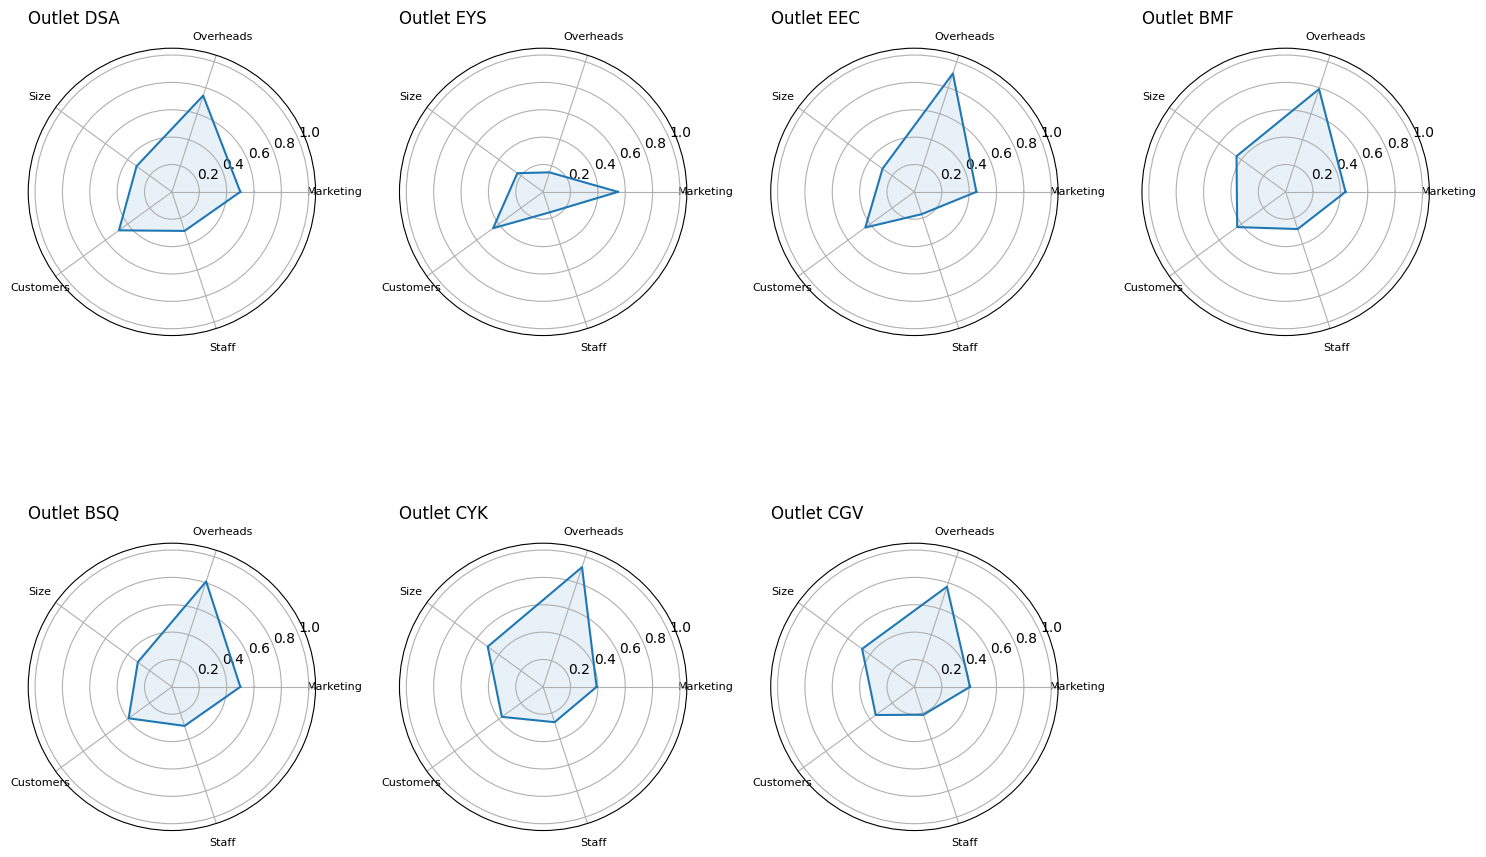

In [ ]:
normalised_data = summary_data / summary_data.max()
print(normalised_data.head())

selected = ['DSA', 'EYS', 'EEC','BMF','BSQ','CYK','CGV']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(15, 15))
counter = 1
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(3, 4, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title('Outlet ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()

###Box plot

#### Box plot of all categories 

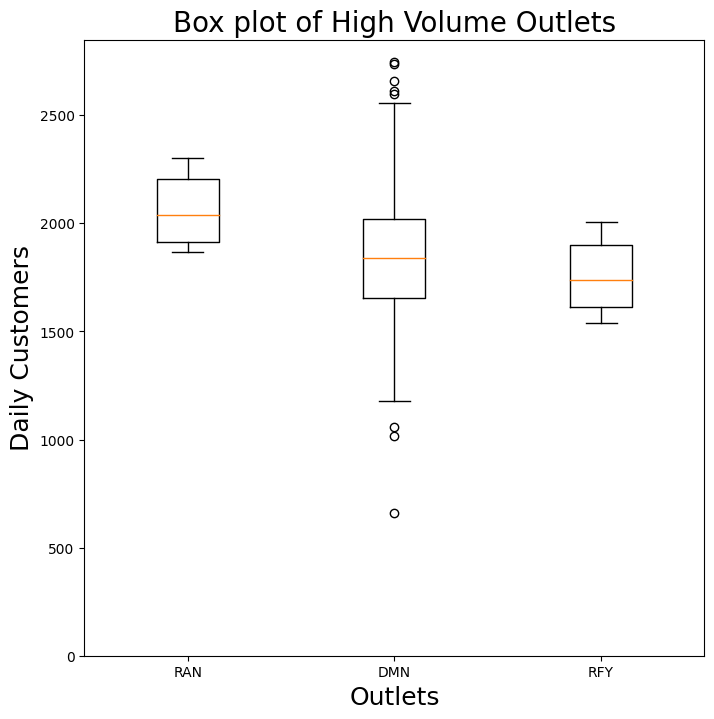

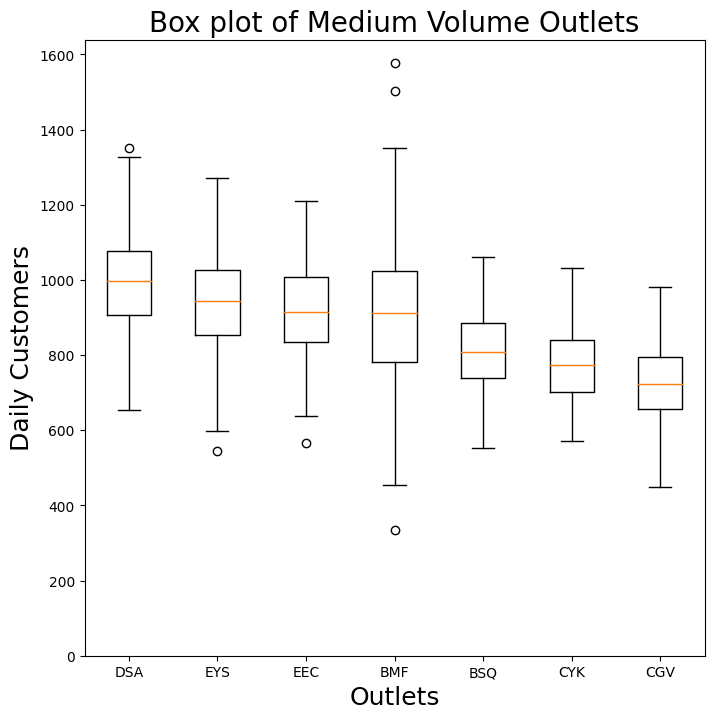

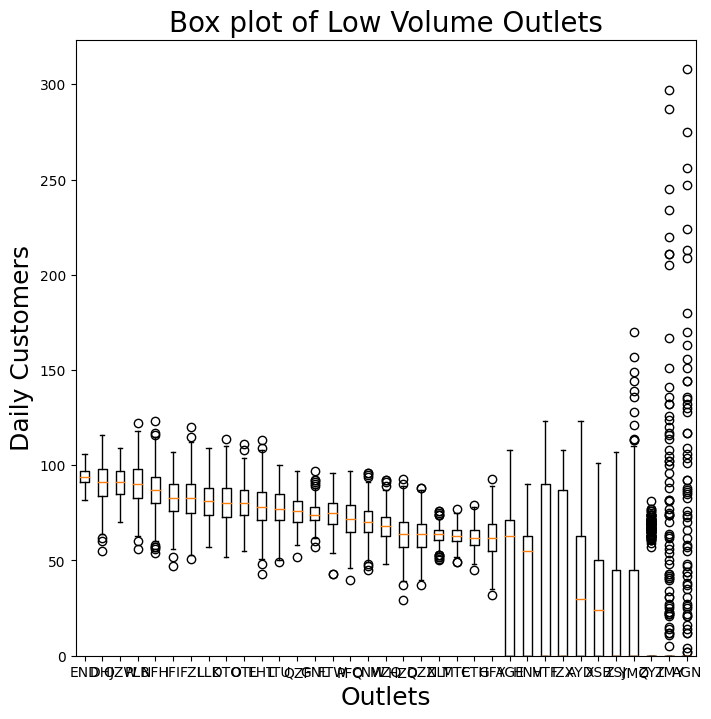

In [ ]:
for i, selected in enumerate(categories_selected):
    plt.figure(figsize=(8, 8))
    # data[selected].boxplot()
    plt.boxplot(data[categories_selected[i]], labels=categories_selected[i])
    plt.xlabel('Outlets', fontsize=18)
    plt.ylabel('Daily Customers', fontsize=18)
    plt.ylim(ymin=0)
    plt.title('Box plot of ' + categories[i] + ' Volume Outlets', fontsize=20)
    plt.show()


#### Box plot of high and medium volume outlets

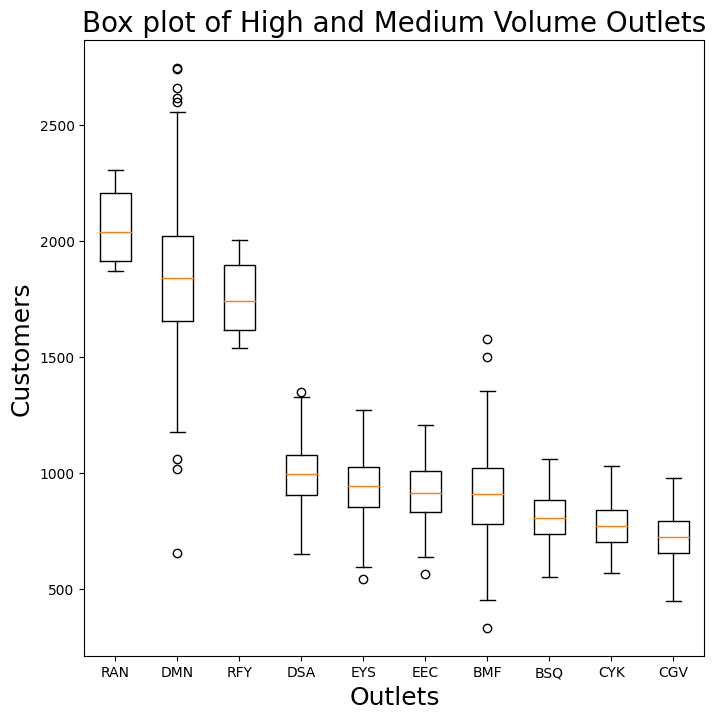

In [ ]:
selected = ['RAN', 'DMN', 'RFY'] + ['DSA', 'EYS', 'EEC','BMF','BSQ','CYK','CGV']

plt.figure(figsize=(8, 8))
# data[selected].boxplot()
plt.boxplot(data[selected], labels=selected)
plt.xlabel('Outlets', fontsize=18)
plt.ylabel('Customers', fontsize=18)
plt.title('Box plot of High and Medium Volume Outlets', fontsize=20)
plt.show()

### Scatter plot

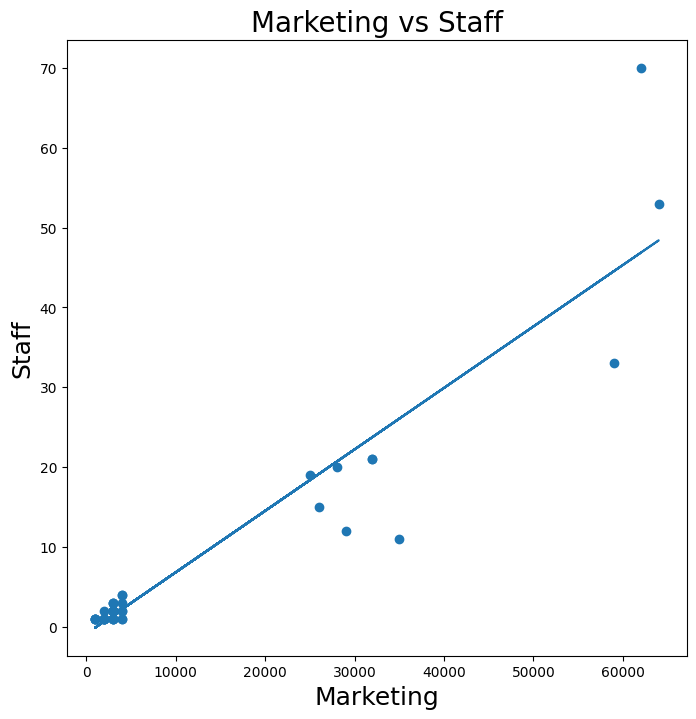

In [ ]:
#Scatter plot between Marketing and Staff
plt.figure(figsize=(8, 8))
plt.scatter(summary_data['Marketing'], summary_data['Staff'])
z = np.polyfit(summary_data['Marketing'], summary_data['Staff'], 1)
trend = np.poly1d(z)
plt.plot(summary_data['Marketing'], trend(summary_data['Marketing']))
plt.title('Marketing vs Staff', fontsize=20)
plt.xlabel('Marketing', fontsize=18)
plt.ylabel('Staff', fontsize=18)
plt.show()

###Line plot (optional)

             RAN   DMN   RFY
Date                        
2021-01-01  2263  1799  2004
2021-01-02  2177  1446  1945
2021-01-03  1999  1808  1757
2021-01-04  1880  1509  1614
2021-01-05  1885  1431  1622


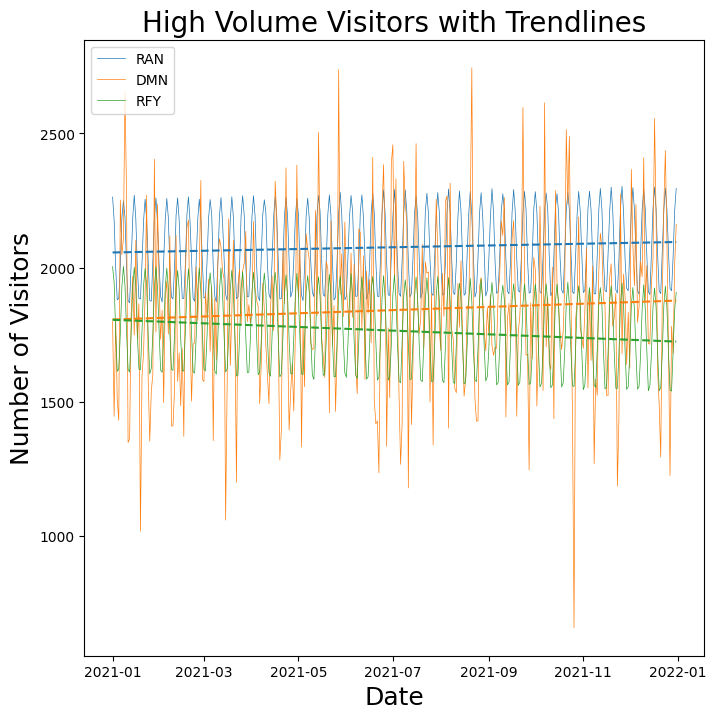

In [ ]:
#Line plot High Volume Trendline
selected = ['RAN', 'DMN', 'RFY']
print(data[selected].head())

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
for name in selected:
    x = np.arange(len(data[name]))
    z = np.polyfit(x, data[name], 1)
    trend = np.poly1d(z)
    plt.plot(data.index, trend(x), linestyle='--')
# plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Visitors', fontsize=18)
plt.title('High Volume Visitors with Trendlines', fontsize=20)
plt.legend(selected, loc=2)
plt.show()

             DSA   EYS   EEC   BMF  BSQ  CYK  CGV
Date                                             
2021-01-01  1030  1092  1061  1196  796  819  727
2021-01-02  1158   909  1209   950  866  821  765
2021-01-03   887   977   934   607  801  739  724
2021-01-04   999   966   833   918  753  626  695
2021-01-05   873   853   913   748  688  720  696


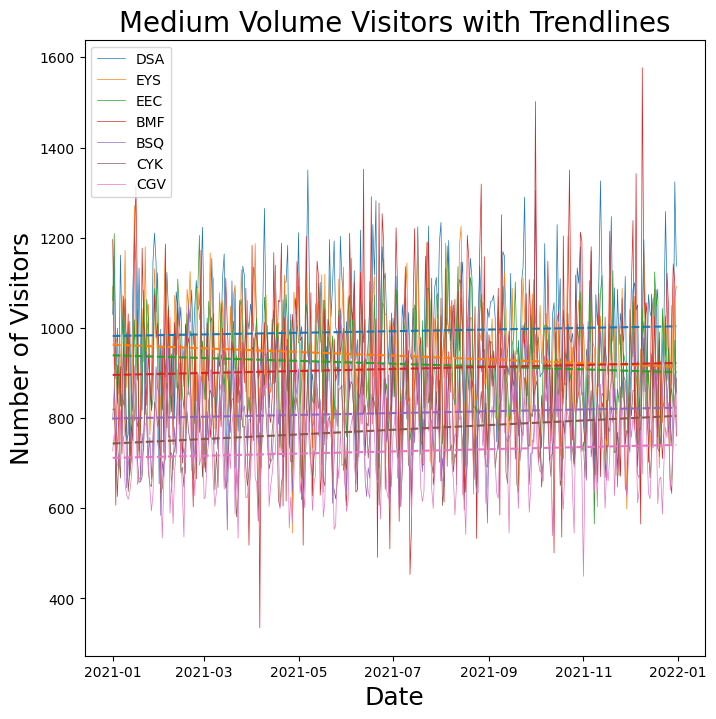

In [ ]:
#Line plot Medium Volume Trendline
selected = ['DSA', 'EYS', 'EEC','BMF','BSQ','CYK','CGV']
print(data[selected].head())

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
for name in selected:
    x = np.arange(len(data[name]))
    z = np.polyfit(x, data[name], 1)
    trend = np.poly1d(z)
    plt.plot(data.index, trend(x), linestyle='--')
# plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Visitors', fontsize=18)
plt.title('Medium Volume Visitors with Trendlines', fontsize=20)
plt.legend(selected, loc=2)
plt.show()


### Heatmap 

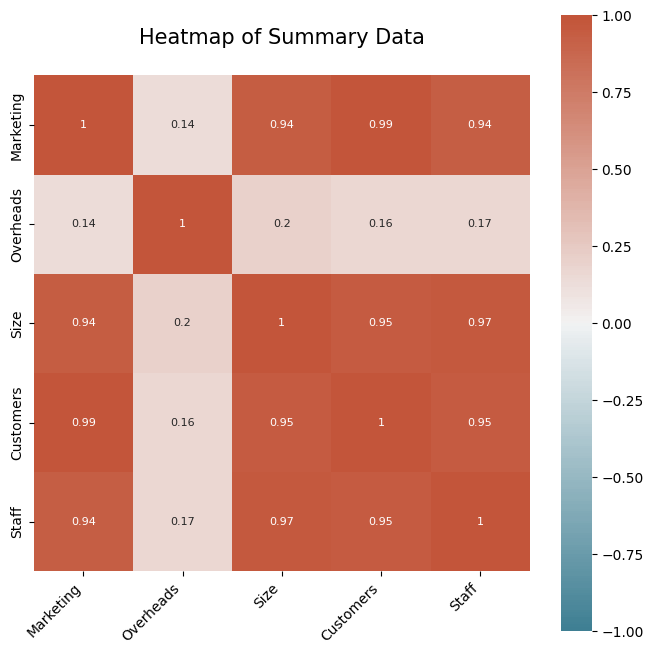

In [ ]:
#Heatmap summary correlation between all variables
plt.figure(figsize=(8, 8))
plt.title('Heatmap of Summary Data\n', fontsize = 15, )
corr = summary_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

There is only one strong correlation between marketing and staff

### Interactive Visualisations

####Interactive Line plot for all outlets

In [ ]:
def get_line_plot(volume, window_size, date_range):
    if volume == 'High':
        selected = ['RAN','DMN','RFY']
    elif volume == 'Medium':
        selected = ['DSA', 'EYS', 'EEC','BMF','BSQ','CYK','CGV']
    else:
        selected = ['END','DHJ','OZW','PLB','NFH','IFI','FZI','LLK','DTO','OTL','EHT','LTU','QZF','GNL','FTW','PFQ','CNW','MZO','HZQ','DZZ','NLT','MTE','CTH','GFA','YGE','HNV','HTF','IZX','AYD','XSB','ZSJ','YMQ','ZYT','ZMY','AGN']
    df = data[selected] # restrict to selected products
    df = df.loc[pd.to_datetime(date_range[0]) : pd.to_datetime(date_range[1])] # restrict to date range
    df = df.rolling(window=window_size).mean() # calculate rolling average
    return df.hvplot.line(frame_height=300, frame_width=500, grid=True)

time_title = '### Time-Series'

volumes = ['High', 'Medium','Low']

volume = pn.widgets.Select(name='Volume', options=volumes, width=200)
day_avg = pn.widgets.IntSlider(name='Day average', value=7, start=1, end=21, width=200)
time_date_range = pn.widgets.DateRangeSlider(name='Dates', width=200,
                                        value=(data.index[0], data.index[-1]),
                                        start=data.index[0], end=data.index[-1])

time_row = pn.Row(
    pn.Column(time_title, volume, day_avg, time_date_range),
    get_line_plot(volume.options[0], day_avg.value, time_date_range.value)
)

def update_time_row(event):
    time_row[1].object = get_line_plot(volume.value, day_avg.value, time_date_range.value)

volume.param.watch(update_time_row, 'value')
day_avg.param.watch(update_time_row, 'value')
time_date_range.param.watch(update_time_row, 'value')

time_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='Volume', options=['High', 'Medium', 'Low'], value='High', width=200)
        [2] IntSlider(end=21, name='Day average', start=1, value=7, width=200)
        [3] DateRangeSlider(end=Timestamp('2021-12-31 0..., name='Dates', start=Timestamp('2021-01-01 0..., value=(Timestamp('2021-01-01 00:..., value_end=Timestamp('2021-12-31 0..., value_start=Timestamp('2021-01-01 0..., width=200)
    [1] HoloViews(NdOverlay, sizing_mode='fixed')

#### Bubble Plot

In [ ]:
def get_summary_plots(variable_x, variable_y, variable_z, bubble_scaling):
    summary_data['BubbleSize'] = summary_data[variable_z] / summary_data[variable_z].max() * math.exp(bubble_scaling)
    return summary_data.hvplot.scatter(frame_height=300, frame_width=300,
                                       title=variable_x + ' vs ' + variable_y + ' (vs ' + variable_z + ')',
                                       alpha=0.5, hover_cols='all', padding=0.1,
                                       x=variable_x, y=variable_y, size='BubbleSize') 


variables_title = '### Variables'

variable_x = pn.widgets.Select(name='X-axis', options=variables, value=variables[0], width=300)
variable_y = pn.widgets.Select(name='Y-axis', options=variables, value=variables[1], width=300)
variable_z = pn.widgets.Select(name='Bubble', options=variables, value=variables[2], width=300)
bubble_scaling = pn.widgets.IntSlider(name='Bubble scaling', value=5, start=0, end=10, width=300)

variables_row = pn.Row(
    pn.Column(variables_title, variable_x, variable_y, variable_z, bubble_scaling),
    get_summary_plots(variable_x.value, variable_y.value, variable_z.value, bubble_scaling.value)
)

def update_variables_row(event):
    variables_row[1].object = get_summary_plots(variable_x.value, variable_y.value, variable_z.value, bubble_scaling.value)

variable_x.param.watch(update_variables_row, 'value')
variable_y.param.watch(update_variables_row, 'value')
variable_z.param.watch(update_variables_row, 'value')
bubble_scaling.param.watch(update_variables_row, 'value')

variables_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='X-axis', options=['Marketing', ...], value='Marketing', width=300)
        [2] Select(name='Y-axis', options=['Marketing', ...], value='Overheads', width=300)
        [3] Select(name='Bubble', options=['Marketing', ...], value='Size', width=300)
        [4] IntSlider(end=10, name='Bubble scaling', value=5, width=300)
    [1] HoloViews(Scatter, sizing_mode='fixed')

#<center> **END of notebook** </center>